In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
import requests
import zipfile
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import PIL.Image
from io import BytesIO
import cv2
import matplotlib.image as mpimg
import seaborn as sns
from tqdm import tqdm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
import shutil

In [9]:

# Path to the zip file
fungi_path = "/content/drive/MyDrive/DS4002/defungi.zip"

# Directory where contents are extracted
fungi_output = "/content/drive/MyDrive/DS4002/Unedited"

# Step 1: Extract the contents of the archive.zip file
#with zipfile.ZipFile(fungi_path, 'r') as zip_ref:
    #zip_ref.extractall(fungi_output)

# Specify the correct path to the image data directory
image_data = fungi_output

pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

files = [i.replace("\\", "/") for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns=["Image", "Label"])

dataframe

,Image,Label
0,/content/drive/MyDrive/DS4002/Unedited/H1/H1_3...,H1
1,/content/drive/MyDrive/DS4002/Unedited/H3/H3_1...,H3
2,/content/drive/MyDrive/DS4002/Unedited/H2/H2_2...,H2
3,/content/drive/MyDrive/DS4002/Unedited/H3/H3_4...,H3
4,/content/drive/MyDrive/DS4002/Unedited/H1/H1_2...,H1
...,...,...
9109,/content/drive/MyDrive/DS4002/Unedited/H1/H1_6...,H1
9110,/content/drive/MyDrive/DS4002/Unedited/H2/H2_5...,H2
9111,/content/drive/MyDrive/DS4002/Unedited/H6/H6_5...,H6
9112,/content/drive/MyDrive/DS4002/Unedited/H5/H5_2...,H5


In [10]:


# Listing the 5 subdirectories in the extracted folder
classes = [os.path.join(fungi_output, o) for o in os.listdir(fungi_output)
           if os.path.isdir(os.path.join(fungi_output,o))]

# Initialize a DataFrame to store image data
image_dimensions = pd.DataFrame()

# Loop through each class folder to extract image paths and labels
for class_path in classes:
    class_name = os.path.basename(class_path)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    data = pd.DataFrame({'path': images, 'label': class_name})
    image_dimensions = pd.concat([image_dimensions, data], ignore_index=True)

# Display the last few rows of the data frame
print(image_dimensions.tail())


                                                   path label
9109  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9110  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9111  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9112  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6
9113  /content/drive/MyDrive/DS4002/Unedited/H6/H6_9...    H6


In [11]:
# No idea why this still isn't working but just deal with it eventually
# Function to get the dimensions of the data
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.size  # returns a tuple (width, height)

# Initialize a DataFrame to store image data
image_dimensions = pd.DataFrame()

# Loop through each class folder to extract image paths and labels
for class_path in classes:
    class_name = os.path.basename(class_path)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    dimensions = [get_image_dimensions(image) for image in images]
    data = pd.DataFrame({'path': images, 'label': class_name, 'dimensions': dimensions})
    image_dimensions = pd.concat([image_dimensions, data], ignore_index=True)

# Convert the dimensions column to a more readable format
image_dimensions['dimensions'] = image_dimensions['dimensions'].apply(lambda d: f"{d[0]}x{d[1]}")

# Display the last few rows of the data frame
print(image_dimensions.tail())

AttributeError: type object 'Image' has no attribute 'open'

## EDA I

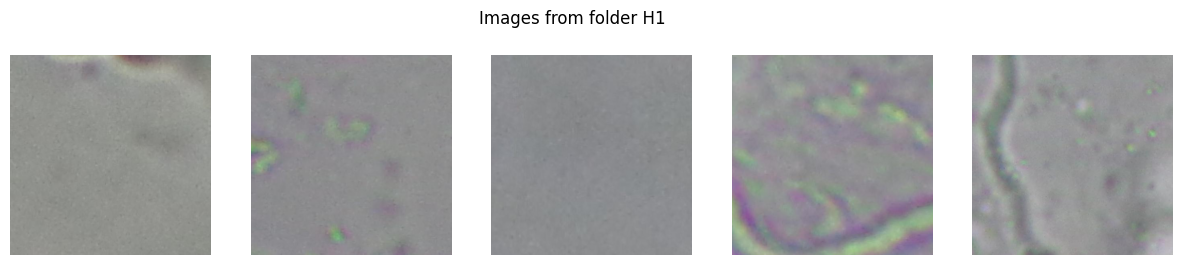

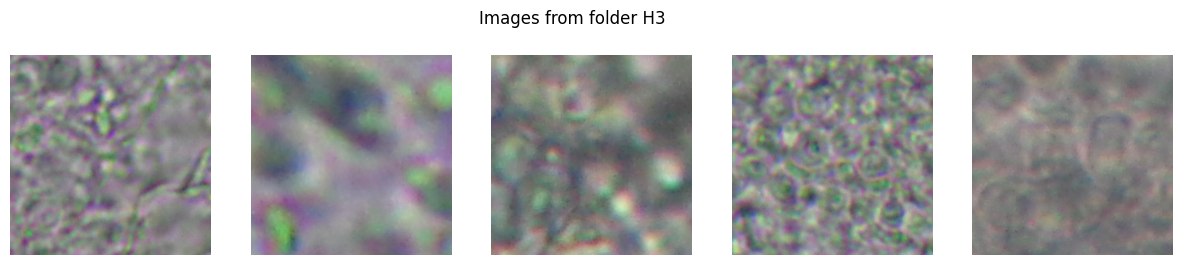

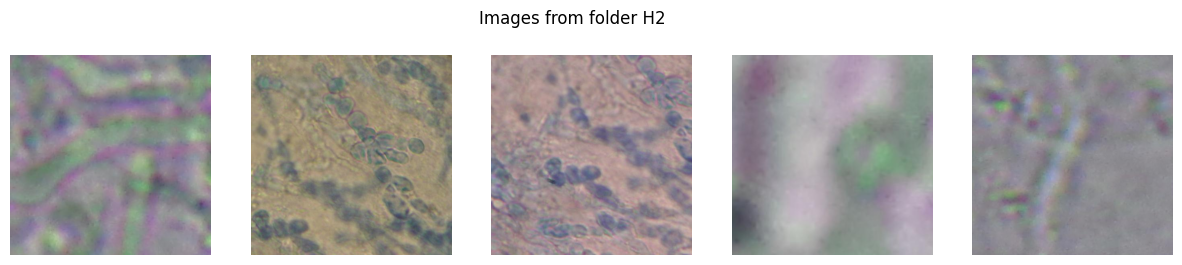

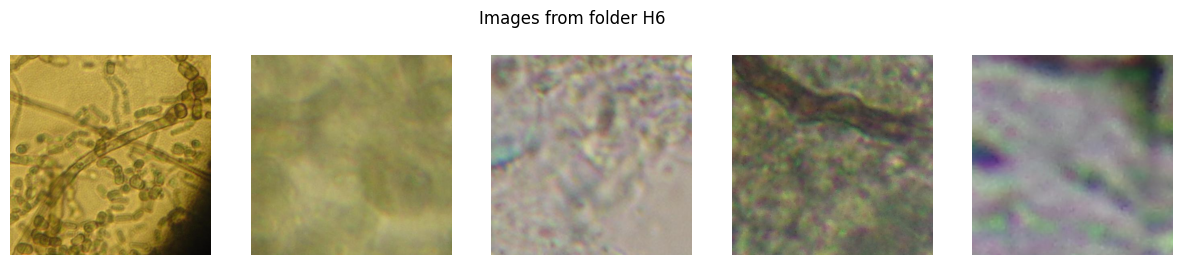

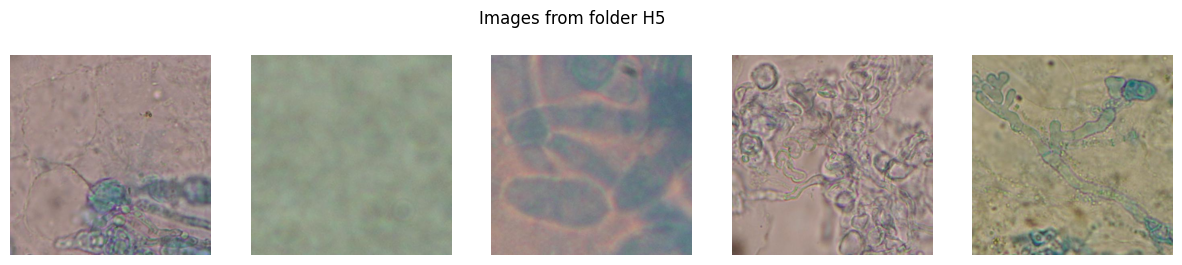

In [12]:
# Visualize 5 images from each folder
folders = dataframe['Label'].unique()

for folder in folders:
    folder_images = dataframe[dataframe['Label'] == folder]['Image'][:5]

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed

    for i, image_path in enumerate(folder_images):
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.suptitle(f"Images from folder {folder}")
    plt.show()

## EDA II

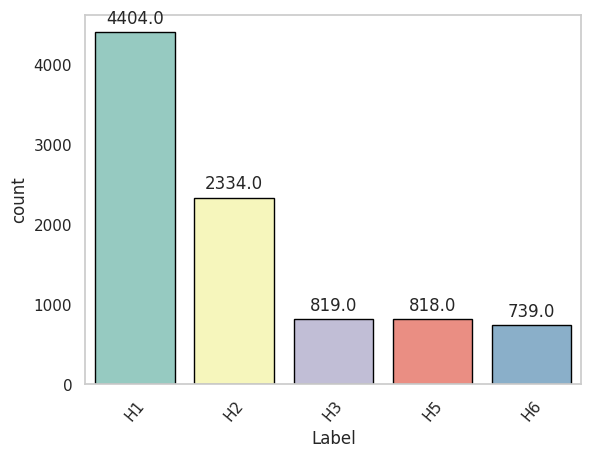

In [ ]:
# Create style for plot
sns.set(style="whitegrid")

# Create a countplot with different colors for each category
ax = sns.countplot(x=dataframe["Label"], palette="Set3", edgecolor='black')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=50)
plt.grid(False)  # Turn off grid lines
plt.show()

## EDA III

### Augmenting the Images


In [ ]:
# # Create a directory to save augmented images
# augmented_dir = "/content/drive/MyDrive/DS4002/AugmentedImages"
# os.makedirs(augmented_dir, exist_ok=True)

# Data augmentation settings
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Apply data augmentation to each image and save the augmented images
# for index, row in dataframe.iterrows():
#     print(row['Image'])
#     img = load_img(row['Image'])
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     # Generate augmented images
#     i = 0
#     for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix=row['Label'], save_format='jpeg'):
#         i += 1
#         if i >= 2:  # Generate 5 augmented images for each original image
#             break

# # Assuming augmented_dir is the directory where augmented images are saved
# augmented_dir = "/content/drive/MyDrive/DS4002/AugmentedImages"

# # Create an empty DataFrame to store information about augmented images
# augmented_dataframe = pd.DataFrame(columns=['Image', 'Label'])

# # Iterate through the augmented images directory
# for filename in os.listdir(augmented_dir):
#     # Assuming the file names are in the format "label_image_index.jpeg"
#     label = filename.split('_')[0]

#     # Create the file path
#     filepath = os.path.join(augmented_dir, filename)

    # Append the information to the DataFrame
#     augmented_dataframe = augmented_dataframe.append({'Image': filepath, 'Label': label}, ignore_index=True)

# # Display the first few rows of the augmented DataFrame
# print(augmented_dataframe)
# print(augmented_dataframe.shape)


In [14]:
def sort_images(base_dir):
    # Define the target folders based on prefixes
    target_folders = ['H1', 'H2', 'H3', 'H5', 'H6']

    # Create target folders if they don't exist
    for folder in target_folders:
        os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

    # Dictionary to track filenames to avoid duplicates
    seen_filenames = {}

    # Iterate over files in the base directory
    for filename in os.listdir(base_dir):
        filepath = os.path.join(base_dir, filename)

        # Skip if it's a directory
        if os.path.isdir(filepath):
            continue

        # Check if the file starts with one of the prefixes
        for prefix in target_folders:
            if filename.startswith(prefix):
                target_path = os.path.join(base_dir, prefix, filename)

                # Check for duplicates
                if filename not in seen_filenames:
                    # Move file to the corresponding folder
                    shutil.move(filepath, target_path)
                    seen_filenames[filename] = True
                else:
                    # Remove duplicate file
                    os.remove(filepath)

# Usage
base_dir = "/content/drive/MyDrive/DS4002/AugmentedImages"
sort_images(base_dir)

## EDA - Augmented Images

In [15]:
enhanced_path = "/content/drive/MyDrive/DS4002/AugmentedImages"
enhanced_images = enhanced_path

files_new = [i.replace("\\", "/") for i in glob.glob(enhanced_images + "//*//*")]
np.random.shuffle(files_new)
labels1 = [os.path.dirname(i).split("/")[-1] for i in files]
data_new = zip(files_new, labels1)
enhanced_df = pd.DataFrame(data_new, columns=["Image", "Label"])

# Visualize 5 images from each folder
folders = enhanced_df['Label'].unique()

for folder in folders:
    folder_images = enhanced_df[enhanced_df['Label'] == folder]['Image'][:5]

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Adjust figsize as needed

    for i, image_path in enumerate(folder_images):
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.suptitle(f"Images from folder {folder}")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Checking Classes of Enhanced Images

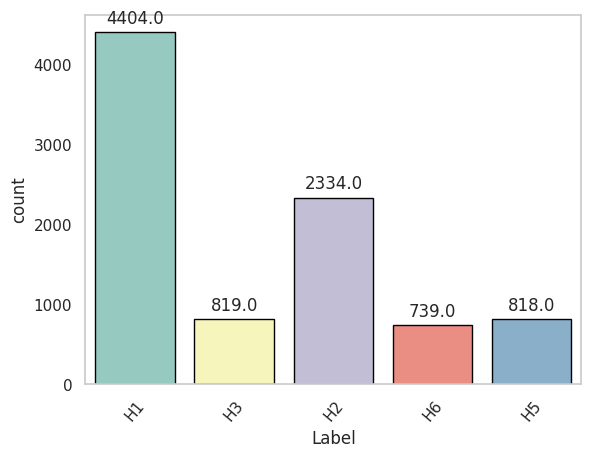

In [16]:
# Create style for plot
sns.set(style="whitegrid")

# Create a countplot with different colors for each category
ax = sns.countplot(x=enhanced_df["Label"], palette="Set3", edgecolor='black')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=50)
plt.grid(False)  # Turn off grid lines
plt.show()

## Model

In [37]:
enhanced_images = enhanced_path

# Listing the 5 subdirectories in the extracted folder
classes = [os.path.join(enhanced_images, o) for o in os.listdir(enhanced_images)
           if os.path.isdir(os.path.join(enhanced_images,o))]

# Initialize a DataFrame to store image data
enhanced_dimensions = pd.DataFrame()

# Loop through each class folder to extract image paths and labels
for class_path in classes:
    class_name = os.path.basename(class_path)
    images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    data = pd.DataFrame({'path': images, 'label': class_name})
    enhanced_dimensions = pd.concat([enhanced_dimensions, data], ignore_index=True)

# Display the last few rows of the data frame
print(enhanced_dimensions.tail())



                                                   path label
9870  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
9871  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
9872  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
9873  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6
9874  /content/drive/MyDrive/DS4002/AugmentedImages/...    H6


Found 7900 validated image filenames belonging to 5 classes.
Found 1975 validated image filenames belonging to 5 classes.
Epoch 1/10
247/247 [==============================] - 2278s 9s/step - loss: 1.3446 - accuracy: 0.5192 - val_loss: 1.0403 - val_accuracy: 0.5605
Epoch 2/10
247/247 [==============================] - 2274s 9s/step - loss: 0.9565 - accuracy: 0.5986 - val_loss: 1.0614 - val_accuracy: 0.5327
Epoch 3/10
247/247 [==============================] - 2275s 9s/step - loss: 0.8434 - accuracy: 0.6566 - val_loss: 0.9899 - val_accuracy: 0.5863
Epoch 4/10
247/247 [==============================] - 2261s 9s/step - loss: 0.6989 - accuracy: 0.7197 - val_loss: 1.0536 - val_accuracy: 0.5625
Epoch 5/10
247/247 [==============================] - 2265s 9s/step - loss: 0.5235 - accuracy: 0.7990 - val_loss: 1.2219 - val_accuracy: 0.5858
Epoch 6/10
247/247 [==============================] - 2273s 9s/step - loss: 0.3225 - accuracy: 0.8822 - val_loss: 1.3790 - val_accuracy: 0.5651
Epoch 7/10
247

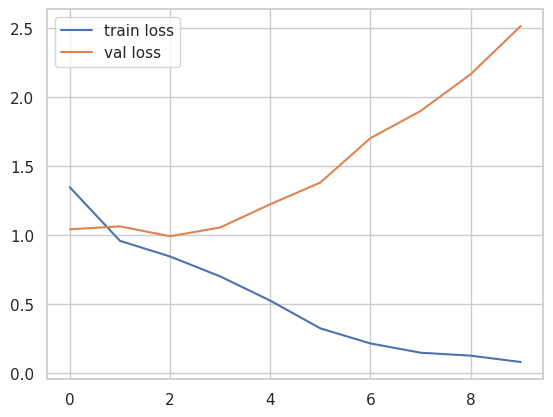

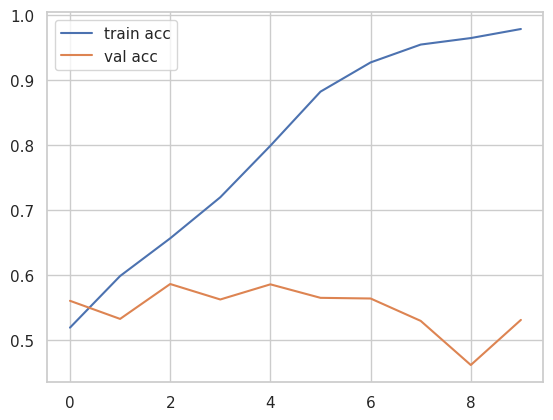

<Figure size 640x480 with 0 Axes>

In [40]:
#initializing CNN and adding a convolutional layer
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(500,500,3))) #3 is for RGB


#doing a Pooling operation to downsample our image
model.add(MaxPooling2D(pool_size=2)) #we are choosing to do MaxPooling. This also helps our model pick up on variation!


#adding 2 more convolutional layers
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2)) #notice how we are pooling everytime
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2)) #with filter numbers 32 and 64

#flattening operation
model.add(Flatten())

#now we are taking our flattened info and will then use it to build the artificial neural network
model.add(Dense(500,activation="relu"))
model.add(Dense(5,activation="softmax")) #using Keras to do this. softmax is used to take our outputs of neural network and build probabilities of each possible outcome in our classes

##now our basic model is done. let us compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X = enhanced_dimensions['path']
y = enhanced_dimensions['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% data as test set

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating our train and test data
datagen = ImageDataGenerator(rescale=1./255)
train_df = pd.DataFrame({'path': X_train, 'label': y_train})
test_df = pd.DataFrame({'path': X_test, 'label': y_test})

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(500, 500),  # Adjust as needed
    batch_size=32,          # Adjust as needed
    class_mode='categorical')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(500, 500),  # Adjust as needed
    batch_size=32,          # Adjust as needed
    class_mode='categorical')
r = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')